# Python初級編２：図形の描画
<!--
import re
with open("comp02-2122.ipynb", encoding="utf-8") as f:
    for line in f:
        m = re.search(r'#+\s*(.*(?:問題|課題).*)\\n', line)
        if m:
            print("* [{}](#{})".format(m.group(1), m.group(1)))
-->

<!--
**目次**
* [練習問題１：フランス国旗](#練習問題１：フランス国旗)
* [練習問題２：日本国旗](#練習問題２：日本国旗)
* [練習問題３：市松模様](#練習問題３：市松模様)
* [練習問題４：正五角形](#練習問題４：正五角形)
* [練習問題５：星型](#練習問題５：星型)
* [練習問題６：星を作る関数](#練習問題６：星を作る関数)
* [練習問題７：プエルトリコの国旗](#練習問題７：プエルトリコの国旗)
* [練習問題８：アメリカ国旗](#練習問題８：アメリカ国旗)
* [練習問題９：ランダムな白黒画像](#練習問題９：ランダムな白黒画像)
* [練習問題10：1次元セルオートマトン](#練習問題10：1次元セルオートマトン)
* [エクストラ課題：ウラムの螺旋](#エクストラ課題：ウラムの螺旋)
-->
## 目次
* [Patch](#Patch)
 * [円](#円)
 * [長方形](#長方形)
* [練習8.1：フランス国旗](#練習8.1：フランス国旗)
* [練習8.2：日本国旗](#練習8.2：日本国旗)
* [練習8.3：市松模様](#練習8.3：市松模様)
 * [多角形](#多角形)
* [練習8.4：正五角形](#練習8.4：正五角形)
* [練習8.5：星型](#練習8.5：星型)
* [練習8.6：星を作る関数](#練習8.6：星を作る関数)
* [練習8.7：プエルトリコの国旗](#練習8.7：プエルトリコの国旗)
* [チャレンジ課題8.8：アメリカ国旗](#チャレンジ課題8.8：アメリカ国旗)
 * [画像の表示](#画像の表示)
* [練習8.9：ランダムな白黒画像](#練習8.9：ランダムな白黒画像)
* [練習8.10：1次元セルオートマトン](#練習8.10：1次元セルオートマトン)
* [課題提出の前の注意](#課題提出の前の注意)
* [チャレンジ課題8.11：ウラムの螺旋](#チャレンジ課題8.11：ウラムの螺旋)

---

このノートブックでは２次元グラフィクスつまり「絵」を出力するプログラムを作成する。

いろいろな絵を作成してもらうが，ポイントは**ループを上手く使うこと**である．
出力したい絵の中の繰り返しパターンを上手くループで表現して，なるべく簡潔なプログラムを作るように頑張ってください．

だいたい「３回以上続けて同じようなことを書いている」場合，それはループを使うべきところである．
とにかく正解が出ればいい，と思って同様のプログラムを繰り返し書かないこと．

ループに限らず，色々なプログラム言語の機能を使って書いてみるのは上達のための早道です．

<!--
さらに，ある絵を描くために書いたプログラムを，別の絵でも使いたいことが出てくるはずです．
そのような場合には，別のセルのプログラムをコピペするのではなく，絵の一部を描くプログラムを**関数にまとめて**別のセルでも使えるように工夫しなさい．
-->

---

まず以下のセルを実行（Shift + Enter）し、必要なモジュールと関数の定義を有効にして下さい（このセルの内容自体を理解する必要はありません）。

In [49]:
from matplotlib import pyplot as plt
from matplotlib.patches import * # Circle, Ellipse 等

# 図形（patch）を描画する関数
# -------
# 入力: 
#   patches : ひとつの patch あるいは patch のリスト
def show_shape(patches):
    # 現在の座標平面を得る
    ax = plt.gca()
    # patch を一つだけ与えた場合
    if isinstance(patches, Patch):
        patches = [patches]
    # 座標平面に図形を加える
    for patch in patches:
        ax.add_patch(patch)
    # 図形が収まる広さに調整
    plt.axis('scaled')
    # 縦横 1:1 で表示
    ax.set_aspect('equal') 
    plt.show()

## Patch
これまでヒストグラムや散布図を表示するために matplotlib というライブラリを利用してきた。

matplotlib では、グラフ以外にも円や長方形などの基本図形を座標平面上に表示することができる。

これらの基本図形のことを patch とよぶ。上のセルで定義してある show_shape は引数として与えた patch を描画する関数である。

show_shape は引数として
* 描画する patch ひとつ，あるいは
* 描画する patch のリスト

を受け取る．
patch のリストを与えた場合は、リスト中の全ての patch が先頭から順に描画される。

### 円
`Circle((x, y), r)` は中心が `(x, y)`、半径が `r` の円を表す patch を作成する。

中心を指定する第一引数には、x座標とy座標をまとめた<font color="red">タプル</font> `(x, y)` を与えることに注意。

下のセルは、中心が $(10, 15)$、半径が $3$ の円 `c1` と、中心が $(0, 0)$、半径が $5$ の円 `c2` を同時に表示する例である。

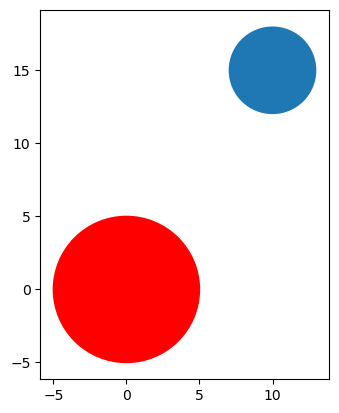

In [50]:
c1 = Circle((10, 15), 3)
c2 = Circle((0, 0), 5, color="red")
show_shape([c1, c2])

上の `c2` のように、patch を作るときに図形の色を**名前付き引数**`color`で指定できる。

色の名前は、`"red"`, `"blue"`, `"black"` などの色名を指定する方法のほか、`"#FF0000"` (赤)や `#000000` (黒) のように、光の３原色である赤(R)、緑(G)、青(B)それぞれの強さ（輝度）を２ケタの１６進数として `"#RRGGBB"` の形式で指定する方法がある。

下のセルを実行すると、黄緑色の円が描画される。

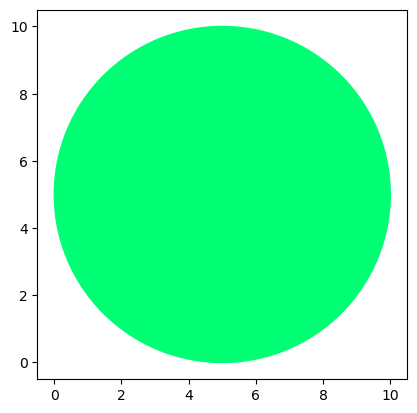

In [51]:
show_shape(Circle((5, 5), color="#00FF75"))

### 長方形
`Rectangle((x, y), w, h)` で、左下の頂点の座標が `(x, y)` で、幅が `w`、高さが `h` の長方形を作成できる。

下のセルを実行すると、原点 $(0, 0)$ を左下の頂点とする、幅$2$、高さ$3$のピンクの長方形が表示される。

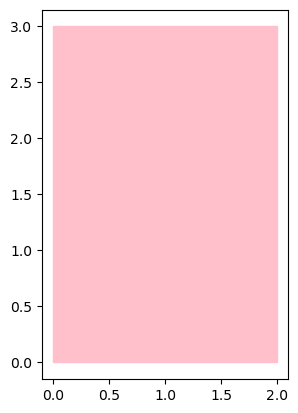

In [52]:
show_shape(Rectangle((0, 0), 2, 3, color="pink"))

図形の色は、フチの色を指定する `edgecolor` と、内部の色を指定する `facecolor` に分けて指定することもできる。

下のセルを実行すると、どんな図形が表示されるか。予想してから実行して確かめなさい。

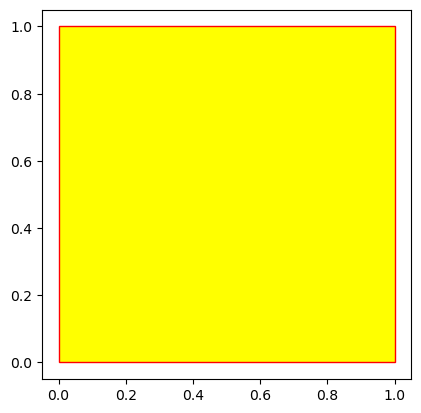

In [53]:
show_shape(Rectangle((0, 0), 1, 1, edgecolor="red", facecolor="yellow"))

名前付き引数 `fill` に `False` を指定すると、内部が塗りつぶされなくなる。

下のセルを実行すると、どんな図形が表示されるか。予想してから実行して確かめなさい。

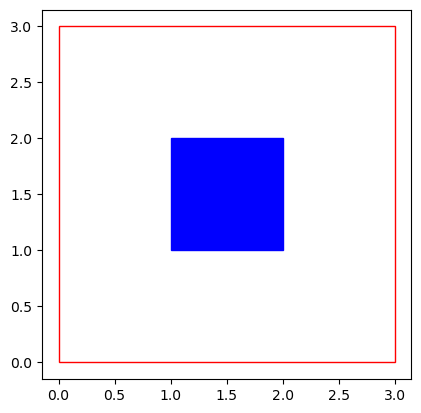

In [54]:
inside = Rectangle((1, 1), 1, 1, color="blue")
border = Rectangle((0, 0), 3, 3, color="red", fill=False)
show_shape([inside, border])

## 練習8.1：フランス国旗
フランス国旗を描きなさい。縦：横の比は 2:3 である。青・白・赤の部分の横幅の比は 1:1:1 とする。

青の部分の正確な色は `"#002395"`、赤の部分の正確な色は `"#ED2939"` に近い。

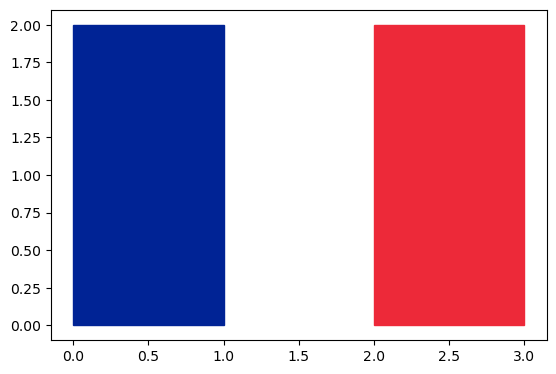

In [55]:
# *** 実装しなさい ***
left = Rectangle((0,0), 1,2, color='#002395')
right = Rectangle((2,0), 1,2, color='#ED2939')
show_shape([left, right])

## 練習8.2：日本国旗
日本国旗を描きなさい。縦：横の比は 2:3 である。赤い円の中心は旗の中心で，直径は旗の縦の長さの 0.6 倍である。赤い円の色はおおよそ `"#BC002D"` である。

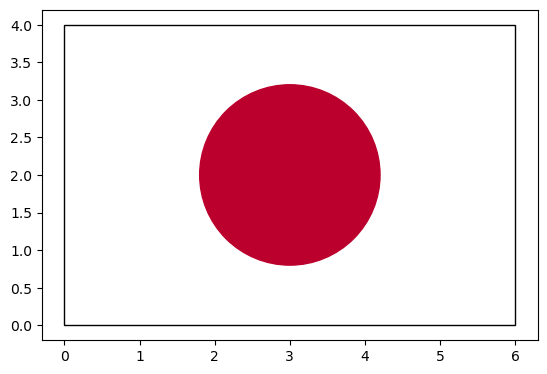

In [56]:
# *** 実装しなさい ***
hinomaru = Circle((3, 2), 1.2, color="#BC002D")
border = Rectangle((0, 0), 6, 4, color="black", fill=False)
show_shape([hinomaru, border])

## 練習8.3：市松模様
正方形を縦に10列、横にも10列並べた[市松模様](https://ja.wikipedia.org/wiki/%E5%B8%82%E6%9D%BE%E6%A8%A1%E6%A7%98)を書いてみなさい。2つの色は好きな色でよい。

`show_shape` では正方形をひとつづつ描き加えることは**できない**ので、全ての図形を（二重リストではなく）**ひとつの**リストにして、いっぺんに `show_shape` に渡す。

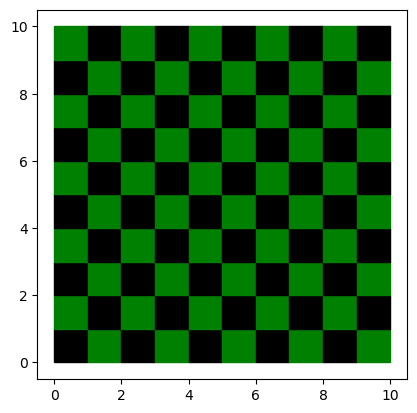

In [57]:
# *** 実装しなさい ***
ichimatsu = []
colors = ["black", "green"]
for i in range (10):
    for j in range (10):
        color_index = (i + j) % 2
        color = colors[color_index]
        rect = Rectangle((i, j), 1, 1, color=color)
        ichimatsu.append(rect)
show_shape(ichimatsu)

### 多角形
点 `(x1, y1), (x2, y2), ..., (xn, yn)` を頂点とする多角形を表す patch を `Polygon([(x1,y2), ..., (xn, yn)])` で作れる。

色や塗りつぶしを指定するキーワード引数も他の patch と同様に指定できる。

例えば、以下のセルを実行すると、`(1, 0), (0, 1), (-1, 0), (0, -1)` を頂点とする赤い正方形が描かれる。

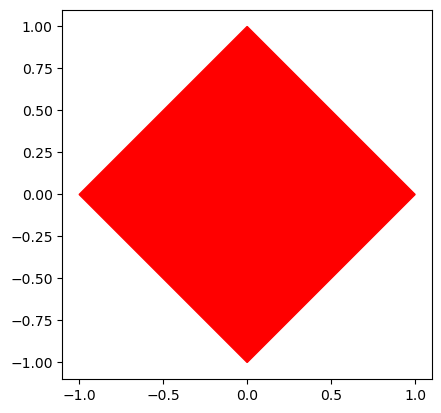

In [58]:
s = Polygon([(1, 0), (0, 1), (-1, 0), (0, -1)], color="red")
show_shape(s)

## 練習8.4：正五角形
原点を中心とし、中心から頂点までの長さが 1 の正5角形を描きなさい。ひとつの頂点は `(0, 1)` にあるようにすること（つまり「左右対称」になるように描くこと）。

ヒント：`import math` すれば、三角関数は `math.cos(角度)` および `math.sin(角度)` で使える。角度はラジアンで指定する。円周率は `math.pi`。

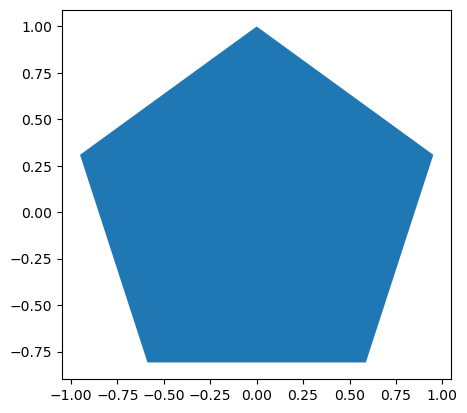

In [59]:
import math

# *** 実装しなさい ***
ver = []
n = 5
r = 1
start = math.pi/2
angle_def = (2*math.pi)/n
for i in range (n):
    angle = start+i*angle_def
    x = math.cos(angle)
    y = math.sin(angle)
    ver.append((x,y))
pentagon = Polygon(ver)
show_shape(pentagon)

## 練習8.5：星型
原点を中心とする黄色の星型☆を描きなさい。外側の頂点（尖っている頂点）5つは正5角形をなし，星の周（輪郭線）は外側の頂点を結ぶ線分の一部となるようにせよ。
全ての座標をひとつひとつ式で書いたりせずに，ループをうまく使うこと！

ヒント1：下図の「赤い線分の長さ：青い線分の長さ」は $1 : \phi^2$、ここで $\phi = \frac{\sqrt{5} - 1}{2}$ である。

![alt text](data:image/svg+xml,%3Csvg%20height%3D%22345.6pt%22%20version%3D%221.1%22%20viewBox%3D%220%200%20460.8%20345.6%22%20width%3D%22460.8pt%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%3E%0A%20%3Cdefs%3E%0A%20%20%3Cstyle%20type%3D%22text%2Fcss%22%3E%0A%2A%7Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Around%3B%7D%0A%20%20%3C%2Fstyle%3E%0A%20%3C%2Fdefs%3E%0A%20%3Cg%20id%3D%22figure_1%22%3E%0A%20%20%3Cg%20id%3D%22patch_1%22%3E%0A%20%20%20%3Cpath%20d%3D%22M%200%20345.6%20%0AL%20460.8%20345.6%20%0AL%20460.8%200%20%0AL%200%200%20%0Az%0A%22%20style%3D%22fill%3A%23ffffff%3B%22%2F%3E%0A%20%20%3C%2Fg%3E%0A%20%20%3Cg%20id%3D%22axes_1%22%3E%0A%20%20%20%3Cg%20id%3D%22patch_2%22%3E%0A%20%20%20%20%3Cpath%20d%3D%22M%2096.256642%20307.584%20%0AL%20376.063358%20307.584%20%0AL%20376.063358%2041.472%20%0AL%2096.256642%2041.472%20%0Az%0A%22%20style%3D%22fill%3A%23ffffff%3B%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22patch_3%22%3E%0A%20%20%20%20%3Cpath%20clip-path%3D%22url%28%23p18f9336026%29%22%20d%3D%22M%20236.16%2053.568%20%0AL%20206.135725%20145.973217%20%0AL%20108.975129%20145.973217%20%0AL%20187.579702%20203.082783%20%0AL%20157.555427%20295.488%20%0AL%20236.16%20238.378435%20%0AL%20314.764573%20295.488%20%0AL%20284.740298%20203.082783%20%0AL%20363.344871%20145.973217%20%0AL%20266.184275%20145.973217%20%0Az%0A%22%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-linejoin%3Amiter%3B%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22patch_4%22%3E%0A%20%20%20%20%3Cpath%20clip-path%3D%22url%28%23p18f9336026%29%22%20d%3D%22M%20236.16%20187.298087%20%0AL%20236.16%2053.568%20%0A%22%20style%3D%22fill%3A%23ff0000%3Bstroke%3A%23ff0000%3Bstroke-linejoin%3Amiter%3B%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22patch_5%22%3E%0A%20%20%20%20%3Cpath%20clip-path%3D%22url%28%23p18f9336026%29%22%20d%3D%22M%20236.16%20187.298087%20%0AL%20266.184275%20145.973217%20%0A%22%20style%3D%22fill%3A%230000ff%3Bstroke%3A%230000ff%3Bstroke-linejoin%3Amiter%3B%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22matplotlib.axis_1%22%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_1%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_2%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_3%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_4%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_5%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_6%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_7%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_8%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22xtick_9%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22matplotlib.axis_2%22%3E%0A%20%20%20%20%3Cg%20id%3D%22ytick_1%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22ytick_2%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22ytick_3%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22ytick_4%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22ytick_5%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22ytick_6%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22ytick_7%22%2F%3E%0A%20%20%20%20%3Cg%20id%3D%22ytick_8%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22patch_6%22%3E%0A%20%20%20%20%3Cpath%20d%3D%22M%2096.256642%20307.584%20%0AL%2096.256642%2041.472%20%0A%22%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Amiter%3Bstroke-width%3A0.8%3B%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22patch_7%22%3E%0A%20%20%20%20%3Cpath%20d%3D%22M%20376.063358%20307.584%20%0AL%20376.063358%2041.472%20%0A%22%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Amiter%3Bstroke-width%3A0.8%3B%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22patch_8%22%3E%0A%20%20%20%20%3Cpath%20d%3D%22M%2096.256642%20307.584%20%0AL%20376.063358%20307.584%20%0A%22%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Amiter%3Bstroke-width%3A0.8%3B%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%20%3Cg%20id%3D%22patch_9%22%3E%0A%20%20%20%20%3Cpath%20d%3D%22M%2096.256642%2041.472%20%0AL%20376.063358%2041.472%20%0A%22%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Amiter%3Bstroke-width%3A0.8%3B%22%2F%3E%0A%20%20%20%3C%2Fg%3E%0A%20%20%3C%2Fg%3E%0A%20%3C%2Fg%3E%0A%20%3Cdefs%3E%0A%20%20%3CclipPath%20id%3D%22p18f9336026%22%3E%0A%20%20%20%3Crect%20height%3D%22266.112%22%20width%3D%22279.806715%22%20x%3D%2296.256642%22%20y%3D%2241.472%22%2F%3E%0A%20%20%3C%2FclipPath%3E%0A%20%3C%2Fdefs%3E%0A%3C%2Fsvg%3E)

ヒント2: 尖っている頂点とへこんでいる頂点が交互に出てくる１０角形として描いてもよいし，「一筆書き」で[五芒星](https://ja.wikipedia.org/wiki/%E4%BA%94%E8%8A%92%E6%98%9F)を描いて塗りつぶしてもよい。

ヒント3: 極座標 $(r, \theta)$ を与えて直交座標 $(r \cos\theta, r\sin\theta)$ に変換する関数を定義して使うと便利である。


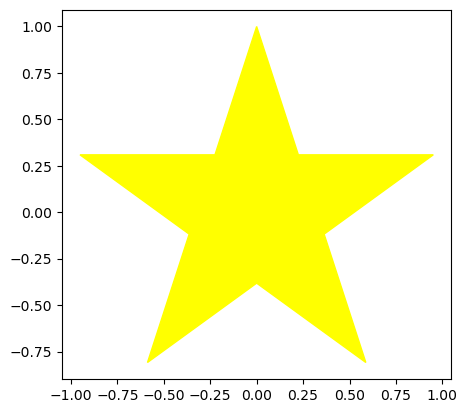

In [60]:
# *** 実装しなさい ***
ver = []
n = 5
r = 1
start = math.pi/2
angle_def = (2*math.pi)/n
phi = (math.sqrt(5)-1)/2
r_inner = r*(phi**2)
for i in range(n):
    angle_out = start+i*angle_def
    x_out = r*math.cos(angle_out)
    y_out = r*math.sin(angle_out)
    ver.append((x_out, y_out))
    angle_in = angle_out+(angle_def/2)
    x_in = r_inner * math.cos(angle_in)
    y_in = r_inner * math.sin(angle_in)
    ver.append((x_in, y_in))
star = Polygon(ver, color="yellow") # 問題文に合わせて色を黄色に
show_shape(star)

## 練習8.6：星を作る関数
中心の座標 `xy = (x, y)` と、中心から遠い方の頂点までの距離（半径）`r`、および色 `c` を与えて、その位置・大きさ・色の星型の Polygon を作成して返す関数 `star(xy, r, c)` を定義しなさい。

また、定義した `star` 関数を用いて、中心が `(0, 0), (2, 0), (0, 2), (2, 2)` で、半径は全て1である4つの星を描きなさい。それぞれの星の色は、"red", "green", "yellow", "orange" からランダムに選ぶものとする。

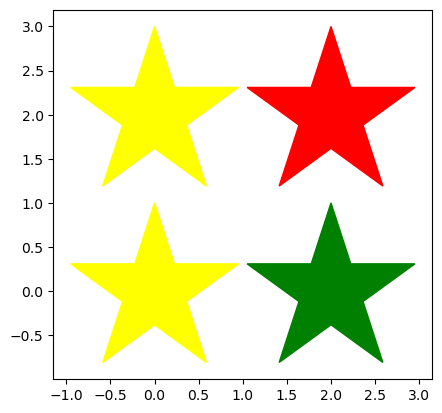

In [61]:
# 入力:
#   xy ... 中心の (x座標, y座標) のタプル
#   r  ... 半径
#   c  ... 色（例："red", "#FF0000"）
def star(xy, r, c):
    # *** 実装しなさい ***
    ver = []
    n = 5
    cx = xy[0]
    cy = xy[1]
    start = math.pi/2
    angle_def = (2*math.pi)/n
    phi = (math.sqrt(5)-1)/2
    r_inner = r*(phi**2)
    
    for i in range(n):
        angle_out = start+i*angle_def
        x_out = cx+r*math.cos(angle_out)
        y_out = cy+r*math.sin(angle_out)
        ver.append((x_out, y_out))
        angle_in = angle_out+(angle_def/2)
        x_in = cx+r_inner * math.cos(angle_in)
        y_in = cy+r_inner * math.sin(angle_in)
        ver.append((x_in, y_in))
    star_obj = Polygon(ver, color=c) 
    return star_obj
    
# *** 星をランダムな色で4つ描くプログラムを実装する ***
import random
colors = ("red", "green", "yellow", "orange")
stars = []
for i in range (0,3,2):
    for j in range (0,3,2):
        xy = (i,j)
        rand = random.randint(0,3)
        s = star(xy,1,colors[rand])
        stars.append(s)
show_shape(stars)

## 練習8.7：プエルトリコの国旗
現在の[プエルトリコの国旗](https://ja.wikipedia.org/wiki/%E3%83%97%E3%82%A8%E3%83%AB%E3%83%88%E3%83%AA%E3%82%B3%E3%81%AE%E6%97%97)を描きなさい。

縦と横の比は 2:3、青い部分は正三角形である。しまの太さ、星の位置および色は目分量でよい。

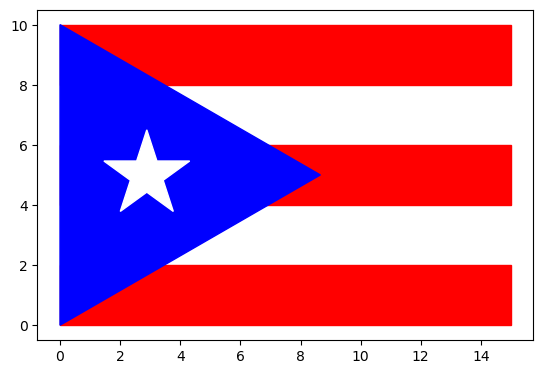

In [62]:
# *** 実装しなさい ***
length = 15
height = 10
shapes = []
stripe_h = height/5

for i in range (0,5,2):
    r = Rectangle((0, i * stripe_h), length, stripe_h, color="red")
    shapes.append(r)

tri_ver = [(0, 0), (0, height), (height/2*(3**0.5), height/2)]
shapes.append(Polygon(tri_ver, color="blue"))

star_x = height/2*(3**0.5) / 3  
star_y = height / 2
star_r = 1.5
shapes.append(star((star_x, star_y), star_r, "white"))

show_shape(shapes)

---
<font color="red">注意</font>: 「アメリカ国旗」の問題の下にもまだ必須課題があります．


## チャレンジ課題8.8：アメリカ国旗
アメリカ国旗を[その仕様](https://en.wikipedia.org/wiki/Flag_of_the_United_States#Specifications)通りに描きなさい。色はリンク先の "Official colors" の表の "Relative - sRGB - 8-bit hex" の欄のRGB値を用いなさい。

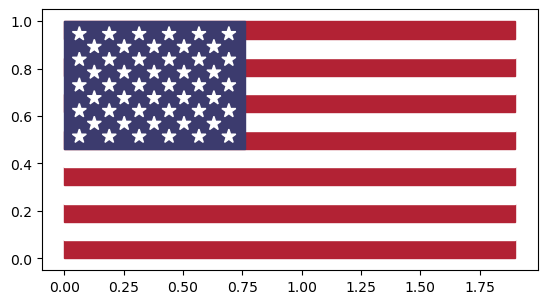

In [63]:
# *** 実装しなさい ***
A = 1.0       # 旗の高さ
B = 1.9       # 旗の幅
C = 0.5385    # カントン（青い部分）の高さ (7/13)
D = 0.76      # カントンの幅
E = 0.054     # 星のパディング（上）
F = 0.054     # 星の行間隔
G = 0.063     # 星のパディング（横）
H = 0.063     # 星の列間隔
K = 0.0616    # 星の直径
L = 0.0769    # 縞の幅 (1/13)

COLOR_WHITE = "#FFFFFF"
COLOR_RED   = "#B22234"
COLOR_BLUE  = "#3C3B6E"

STAR_R = K / 2
shapes = []

for i in range(13):
    color = COLOR_RED if i % 2 == 0 else COLOR_WHITE
    rect = Rectangle((0, i * L), B, L, color=color)
    shapes.append(rect)

union_y = A - C
union_rect = Rectangle((0, union_y), D, C, color=COLOR_BLUE)
shapes.append(union_rect)

for row in range(9):
    star_y = A - (E + row * F)
    
    if row % 2 == 0:
        num_stars = 6
        x_offset = G
    else:
        num_stars = 5
        x_offset = G + H
        
    for col in range(num_stars):
        star_x = x_offset + col * (2 * H)
        
        s = star((star_x, star_y), STAR_R, COLOR_WHITE)
        shapes.append(s)

show_shape(shapes)

### 画像の表示
matplotlib はグラフや patch の表示のほか、画像データを直接表示することができる。

今回の演習では、2重リストで表された2値画像（白黒画像）を表示することにする。

コンピュータで表示される画像は，いろいろな色をもつ小さなマス目を縦横に並べてできている．
この縦横にならんだマス目それぞれの色を2重リストで表すことにする．
それぞれのマス目のことをピクセル（画素）と呼ぶ．

2重リストを `img` とするとき、`img[y][x]` は左から x 番目，下から y 番目のピクセルの色を表す．
正確に言えば，`img[y][x]` は「左下が座標 (x, y) の一辺の長さ 1 の正方形」に対応する（添え字の順番に注意）。

2重リストの各要素は 0 または 1 で、0 が白、1 が黒を表すものとする。

下のセルの関数 `show_img(img)` は2次元リスト `img` を受け取って、それを白黒画像として表示する（関数の中身を理解する必要はない）。

In [64]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, origin="lower", extent=(0, len(img[0]), 0, len(img)), interpolation='nearest', cmap=cm.Greys)          
    plt.show()  

下のセルを実行すると、2次元リスト `char_a` が画像として表示される。

データと画像の上下の対応関係に注意しなさい。

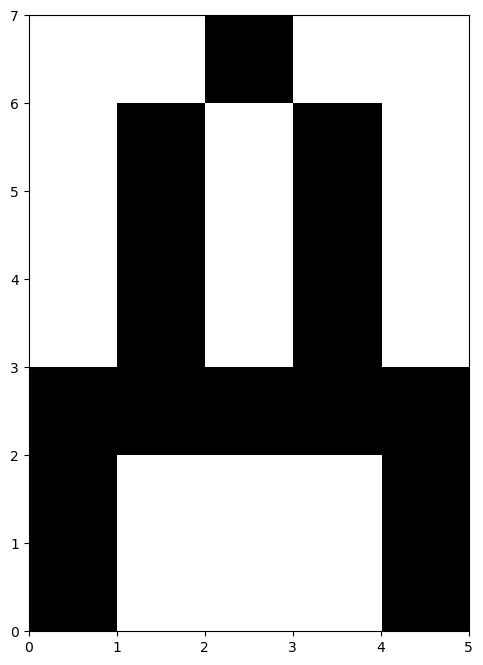

In [65]:
char_a = [[1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 1],
          [0, 1, 0, 1, 0],
          [0, 1, 0, 1, 0],
          [0, 1, 0, 1, 0],
          [0, 0, 1, 0, 0]]

show_img(char_a)

## 練習8.9：ランダムな白黒画像
100 x 100 の白黒画像の各ピクセルをランダムに白（1）か黒（0）に塗って表示してみなさい。

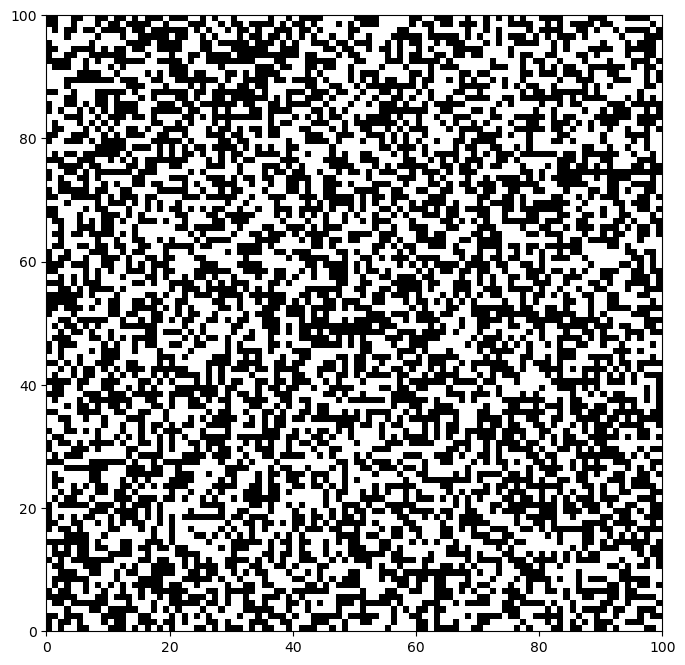

In [66]:
# まず空（すべて白）の 100 x 100 の2次元リストを作る
img = []
for _ in range(100):
    line = [] # 横線に対応
    for _ in range(100):
        line.append(0) # すべて白
    img.append(line)

import random

# ** 実装しなさい **
# random.randint を使って
# img の各要素 img[0][0] ... img[99][99] に
# ランダムに 1 か 0 を入れる

for i in range (100):
    for j in range (100):
        img[i][j] = random.randint(0, 1)

# 表示
show_img(img)        

## 練習8.10：1次元セルオートマトン
$n$ を正の整数とし、$(2n + 1) \times (2n + 1)$ の白黒画像 `img` の各ピクセル `img[y][x]` の色を以下のように定める。

$y = 0$ の横線は中央のピクセルのみが黒。すなわち：
* `img[0][m] = 1` （$m = n$）
* `img[0][m] = 0` （$m \ne n$）

$y > 0$ に対する横線の両端は白。すなわち $y > 0$ に対して
* `img[y][0] = 0`
* `img[y][2*n] = 0`

$y > 0$ に対する横線の両端以外のピクセルの色は、その下の段の色に従って以下のように定める:


`(img[y-1][x-1], img[y-1][x], img[y-1][x+1])` の三つ組みを $(c_1, c_2, c_3)$ とするとき、
* $(c_1, c_2, c_3) = (0, 0, 0)$ ならば `img[y][x] = 0`
* $(c_1, c_2, c_3) = (0, 0, 1)$ ならば `img[y][x] = 1`
* $(c_1, c_2, c_3) = (0, 1, 0)$ ならば `img[y][x] = 0`
* $(c_1, c_2, c_3) = (0, 1, 1)$ ならば `img[y][x] = 1`
* $(c_1, c_2, c_3) = (1, 0, 0)$ ならば `img[y][x] = 1`
* $(c_1, c_2, c_3) = (1, 0, 1)$ ならば `img[y][x] = 0`
* $(c_1, c_2, c_3) = (1, 1, 0)$ ならば `img[y][x] = 1`
* $(c_1, c_2, c_3) = (1, 1, 1)$ ならば `img[y][x] = 0`

上のルールで決まる白黒画像を $n = 100$ の場合について表示せよ。

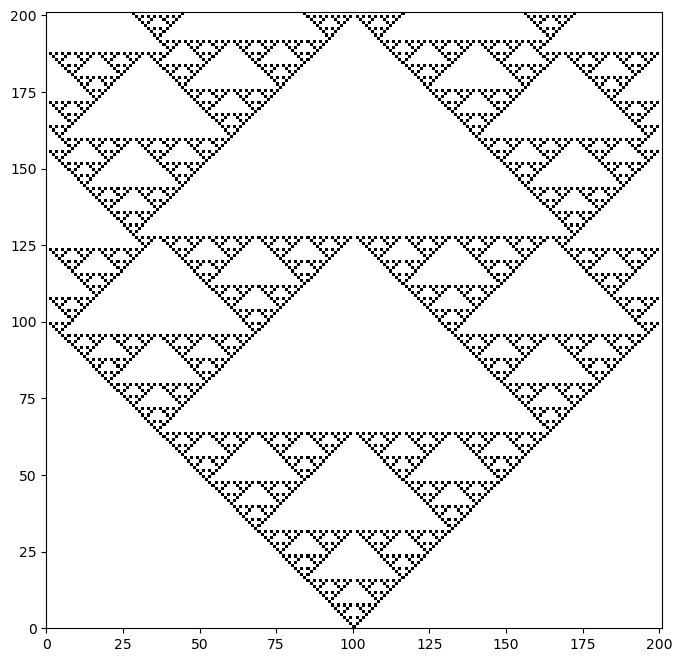

In [67]:
n = 100

# 空（すべて白）の (2n+1) x (2n+1) の2次元リストを作る
img = []
for _ in range(2 * n + 1):
    line = [] # 横線に対応
    for _ in range(2 * n + 1):
        line.append(0) # すべて白
    img.append(line)
    
# 最下段は中央のピクセルのみ黒
img[0][n] = 1

# *** 実装しなさい ***
# y = 1, 2, ..., 2*n について img[y][x] の色をルールに従って決める
for y in range(1, 2*n+1):
    for x in range (1,2*n):
        c1 = img[y-1][x-1]
        c2 = img[y-1][x]
        c3 = img[y-1][x+1]
        pattern = (c1, c2, c3)
        if pattern in [(0, 0, 1), (0, 1, 1), (1, 0, 0), (1, 1, 0)]:
            img[y][x] = 1
        else:
            img[y][x] = 0
# 表示
show_img(img)

<!--
おまけ：色を決めるルールで、$y > 0$ の段の両端以外の色の決め方を

`(img[y-1][x-1], img[y-1][x], img[y-1][x+1])` の三つ組みを $(c_1, c_2, c_3)$ とするとき、
* $(c_1, c_2, c_3) = (0, 0, 0)$ ならば `img[y][x] = 0`
* $(c_1, c_2, c_3) = (0, 0, 1)$ ならば `img[y][x] = 1`
* $(c_1, c_2, c_3) = (0, 1, 0)$ ならば `img[y][x] = 1`
* $(c_1, c_2, c_3) = (0, 1, 1)$ ならば `img[y][x] = 1`
* $(c_1, c_2, c_3) = (1, 0, 0)$ ならば `img[y][x] = 1`
* $(c_1, c_2, c_3) = (1, 0, 1)$ ならば `img[y][x] = 0`
* $(c_1, c_2, c_3) = (1, 1, 0)$ ならば `img[y][x] = 0`
* $(c_1, c_2, c_3) = (1, 1, 1)$ ならば `img[y][x] = 0`

と変更するとどうなるか？
-->

お疲れ様でした．以上で今回の必須課題は終わりです．

---

## 課題提出の前の注意
* かならずメニューの "Run" から <font color="red">"Run All Above Selected Cells"</font> を選択し，ここまでの全てのセルが正しく実行されることを確認すること
  * "Run All Cells" を選択すると，下のチャレンジ課題のセルが実行されてエラーになります．必須課題のところが正しく実行されていれば問題はありませんが．
* "Run All Above Above Selected Cells" を実行したら，各セルの実行結果が表示されている状態で保存のボタンを押してノートブックを保存すること
* 上記のようにして，実行結果まで含めて保存してからノートブックを提出すること．

## チャレンジ課題8.11：ウラムの螺旋
$N$ を奇数とし、$N \times N$ のマス目に、次のように、中央のマスから渦巻状に 1 から $N^2$ までの番号を振る：

$$
\begin{array}{ccccc}
 & & & & \vdots \\
13 & 12 & 11 & 10 & 25 \\
14 & 3  & 2  & 9 &  24 \\
15 & 4 & 1 &  8 & 23 \\
16 & 5 & 6 & 7 & 22 \\
17 & 18 & 19 & 20 & 21 \\
\end{array}
$$

番号が素数のマス目を黒、それ以外を白で塗ったものを画像として表示するとどうなるか？素数の出現に関する規則が見えるか？


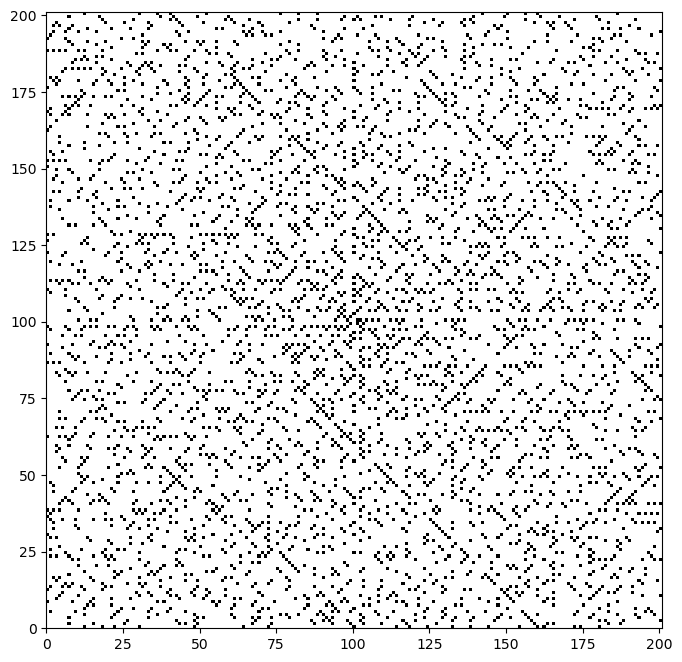

In [68]:
# 入力
#   n ... 非負の整数
# 出力
#   n が素数ならば True, それ以外は False
def is_prime(n):
    if n <= 1:
        return False
    for m in range(2, n):
        if m * m > n:
            return True
        if n % m == 0:
            return False
    return True

# (2n + 1) x (2n + 1) のマスを全て白（0）で塗る
n = 100
cells = [[0 for _ in range(2 * n + 1)] for _ in range(2 * n + 1)]

# *** 実装しなさい：上の規則に従って素数のマスに黒（1）をセットする ***
x = n
y = n
num = 1 # 現在の数字（1からスタート）
step = 1 # 一度に進む歩数

# 1から順に渦巻き状に数字を埋めていく
while num < (2 * n + 1) ** 2:
    
    # --- 1. 右へ移動 ---
    for _ in range(step):
        x += 1
        num += 1
        # 範囲を超えたら終了
        if num > (2 * n + 1) ** 2: break
        # 素数なら黒(1)にする
        if is_prime(num):
            cells[y][x] = 1
            
    if num >= (2 * n + 1) ** 2: break
    
    # --- 2. 上へ移動 ---
    for _ in range(step):
        y -= 1  # 画像座標系では上はマイナス
        num += 1
        if num > (2 * n + 1) ** 2: break
        if is_prime(num):
            cells[y][x] = 1
            
    # 「右・上」のセットが終わったら歩数を1増やす
    step += 1
    
    # --- 3. 左へ移動 ---
    for _ in range(step):
        x -= 1
        num += 1
        if num > (2 * n + 1) ** 2: break
        if is_prime(num):
            cells[y][x] = 1

    if num >= (2 * n + 1) ** 2: break

    # --- 4. 下へ移動 ---
    for _ in range(step):
        y += 1
        num += 1
        if num > (2 * n + 1) ** 2: break
        if is_prime(num):
            cells[y][x] = 1
            
    # 「左・下」のセットが終わったら歩数を1増やす
    step += 1
                
show_img(cells)

**初級編２：おわり**